# Student Performance indicator

* 1)Problem Statement:
* This project understand how to student's performance is affected by other varibles such as Gender,ethnicity,parental level of education,luncg and test Preparation course.    

# importing Data and Required Packages

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing thr dataset

In [110]:
df=pd.read_csv("data\StudentsPerformance.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [111]:
# shape of the dataset
df.shape

(1000, 8)

In [112]:
# checking the missing value
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Insights:
- **There are no missing values** in this dataset, indicating that all records are complete and ready for analysis.


In [113]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [114]:
# check the duplicate
df.duplicated().sum()

0

In [115]:
# Display rows from index 580 to 589
df[580:590]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
580,female,group D,some high school,standard,none,81,97,96
581,female,group E,some high school,standard,none,77,79,80
582,female,group D,bachelor's degree,free/reduced,none,63,73,78
583,female,group D,associate's degree,standard,completed,73,75,80
584,female,group D,some college,standard,none,69,77,77
585,female,group C,associate's degree,standard,none,65,76,76
586,female,group A,high school,standard,none,55,73,73
587,female,group C,bachelor's degree,free/reduced,none,44,63,62
588,female,group C,some college,standard,none,54,64,65
589,female,group A,some high school,standard,none,48,66,65


# checking the number of unique values of each columns

In [116]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# check statistics of the data

In [117]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Exploring Data

In [118]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [119]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [120]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# Feature Engineering

# Adding columns for "Total Score" and "Average"

In [121]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [122]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [123]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [124]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


## 🎓 **Insights from Student Performance Data**

1. **⚠️ Underperformance in Maths**: 
   - After analyzing the results, it's clear that students have **performed the worst** in the **Maths** section. 
   - 📉 This subject requires **urgent attention** to improve overall academic outcomes.

   ```python
   # Analysis
   performance = {"Maths": "Worst", "Reading": "Best"}
   alert("Focus on Maths!")


 # Exploring Data ( Visualization )

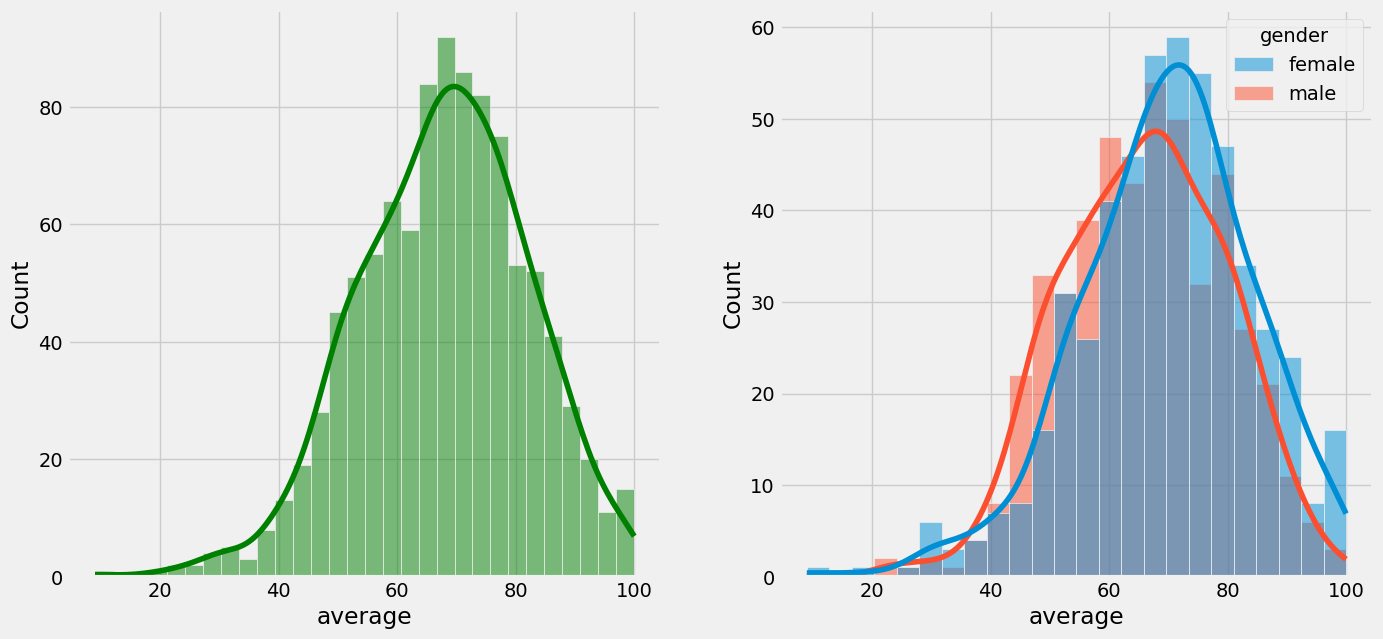

In [125]:
#Histogram & KDE
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

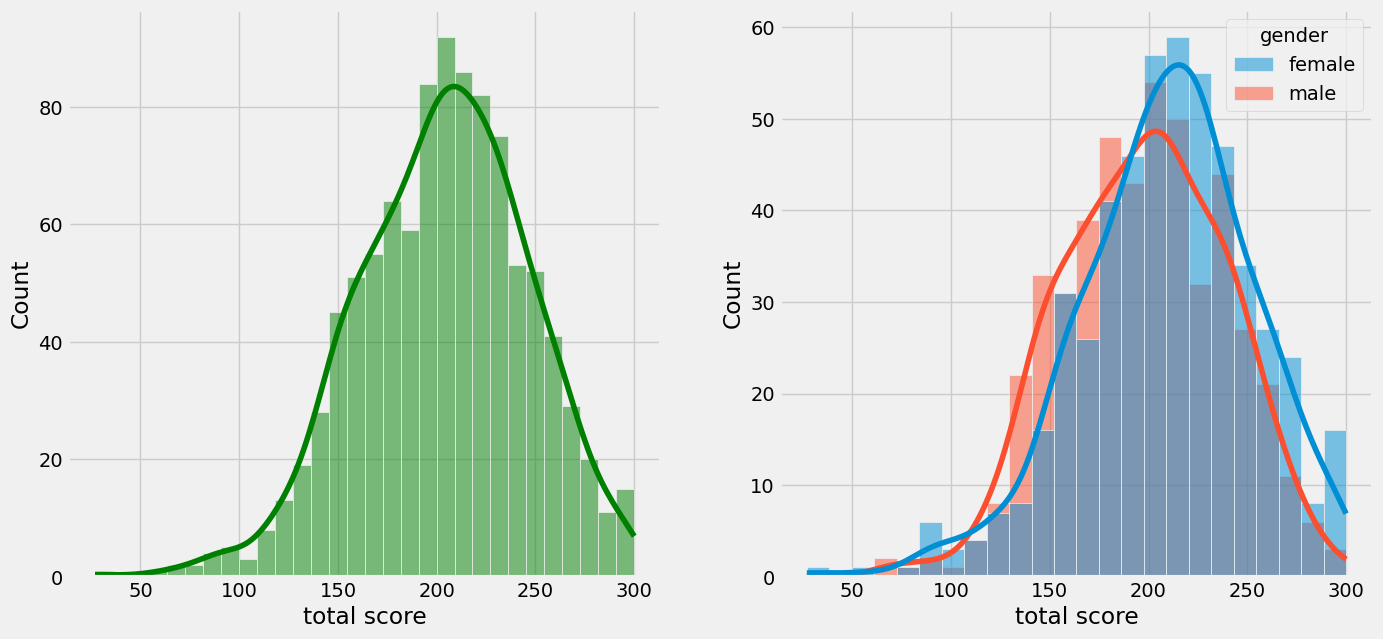

In [126]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

## 🌟 **Performance Insights: Gender Comparison**

- **👩 Female Students Shine**:
  - Data indicates that **female students** have consistently outperformed their male counterparts across various subjects.
  - 📈 Their **strong performance** is especially evident in subjects like Reading and Writing.

   ```python
   # Insight
   gender_performance = {"Female": "Better", "Male": "Needs Improvement"}
   print("Female students are excelling!")


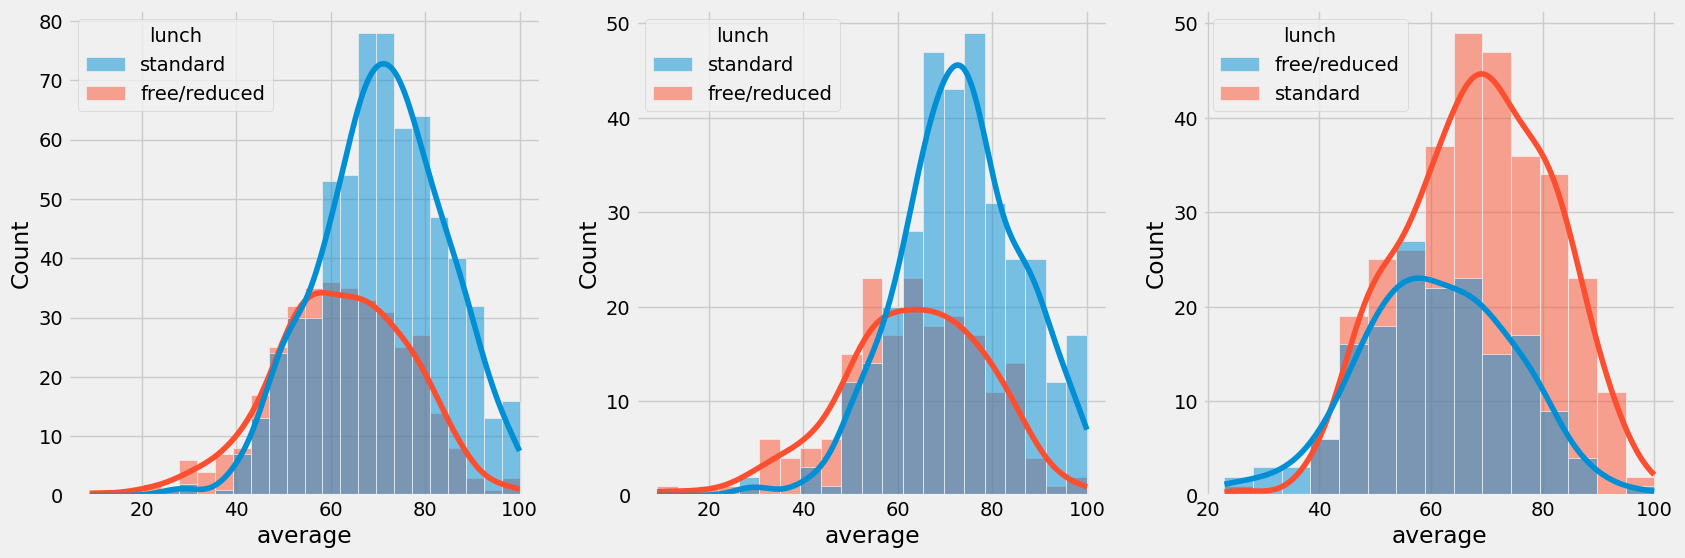

In [127]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

## 🍽️ **Insights: Impact of Standard Lunch on Exam Performance**

- **🥇 Standard Lunch = Better Performance**:
  - Data suggests that students who have a **standard lunch** tend to perform **significantly better** in exams.
  - 🍏 **Well-balanced nutrition** seems to play a crucial role in academic success.

   ```python
   # Insight
   lunch_type = {"Standard Lunch": "Better Performance", "Free/Reduced Lunch": "Lower Performance"}
   print("Standard lunch boosts exam scores!")


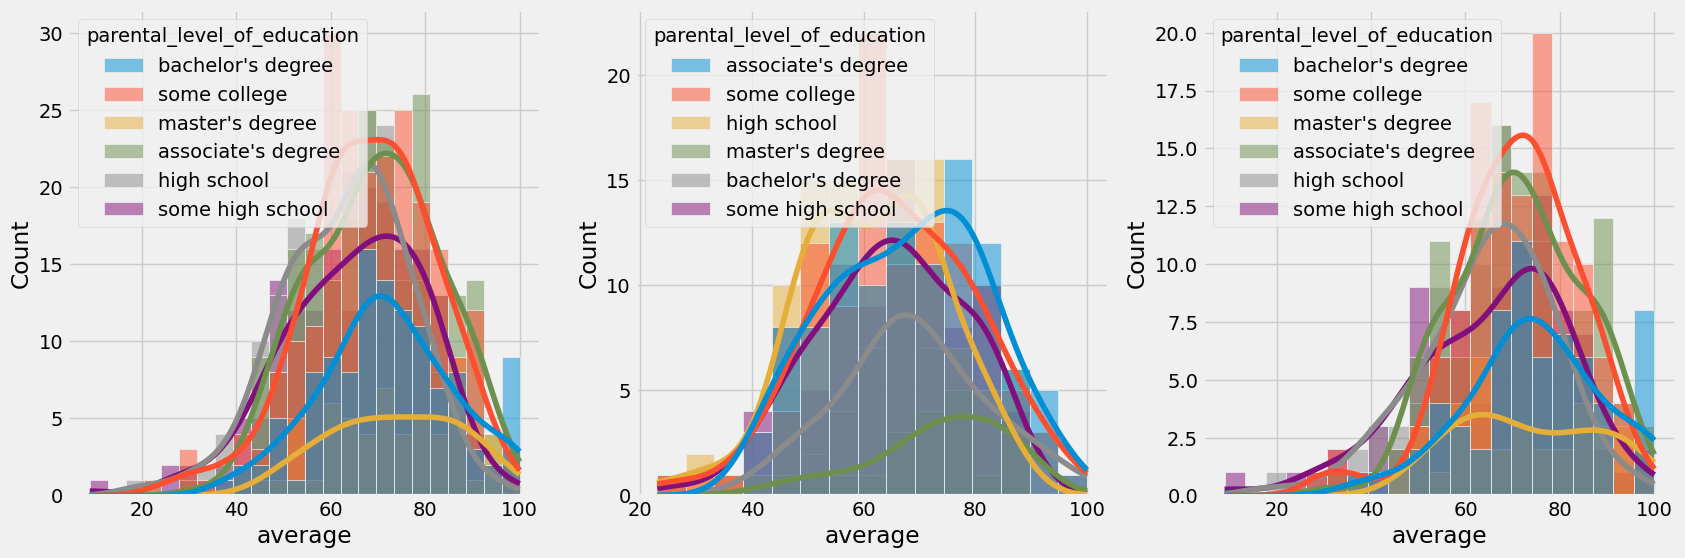

In [128]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

## 📚 **Insights: Parent's Education vs. Student Performance**

1. **🎓 Parent's Education Does Not Directly Correlate with Exam Performance**:
   - The overall data reveals that **parent's education** level, in general, doesn't have a significant impact on how well students perform in exams.
   - 🧐 This suggests that other factors, such as **study habits** and **school environment**, might play a larger role.

   ```python
   # Insight
   education_impact = "Minimal"
   print("Parent's education level has little effect on overall student performance.")


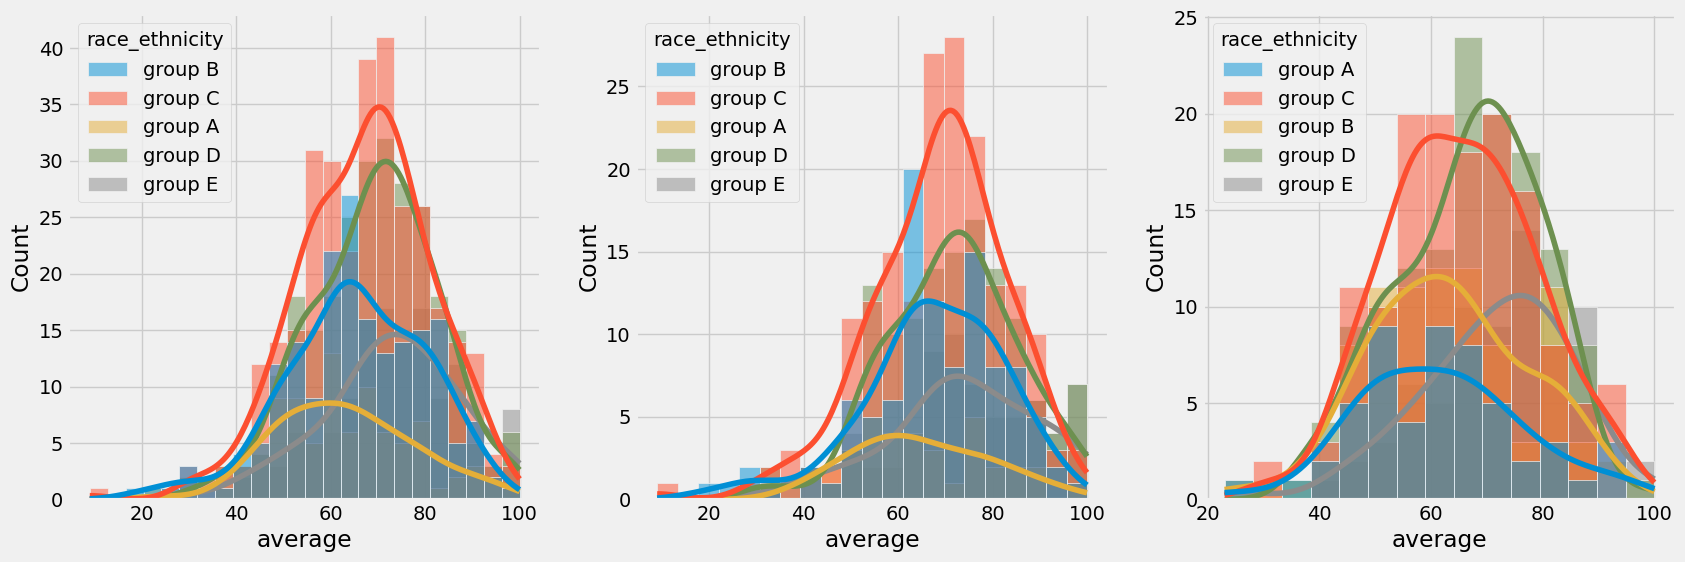

In [129]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

## 📊 **Insights: Score Distribution Across Subjects**

1. **🔢 Maths Scores**:
   - From the analysis of the **Maths** plot, it's clear that most students score in the range of **60-80**.
   - 🧮 This indicates that **Maths** has a narrower score distribution compared to other subjects.

   ```python
   # Maths score range
   maths_scores = {"Range": "60-80"}
   print("Majority of students fall between 60-80 in Maths.")


# Multivariate analysis using pieplot

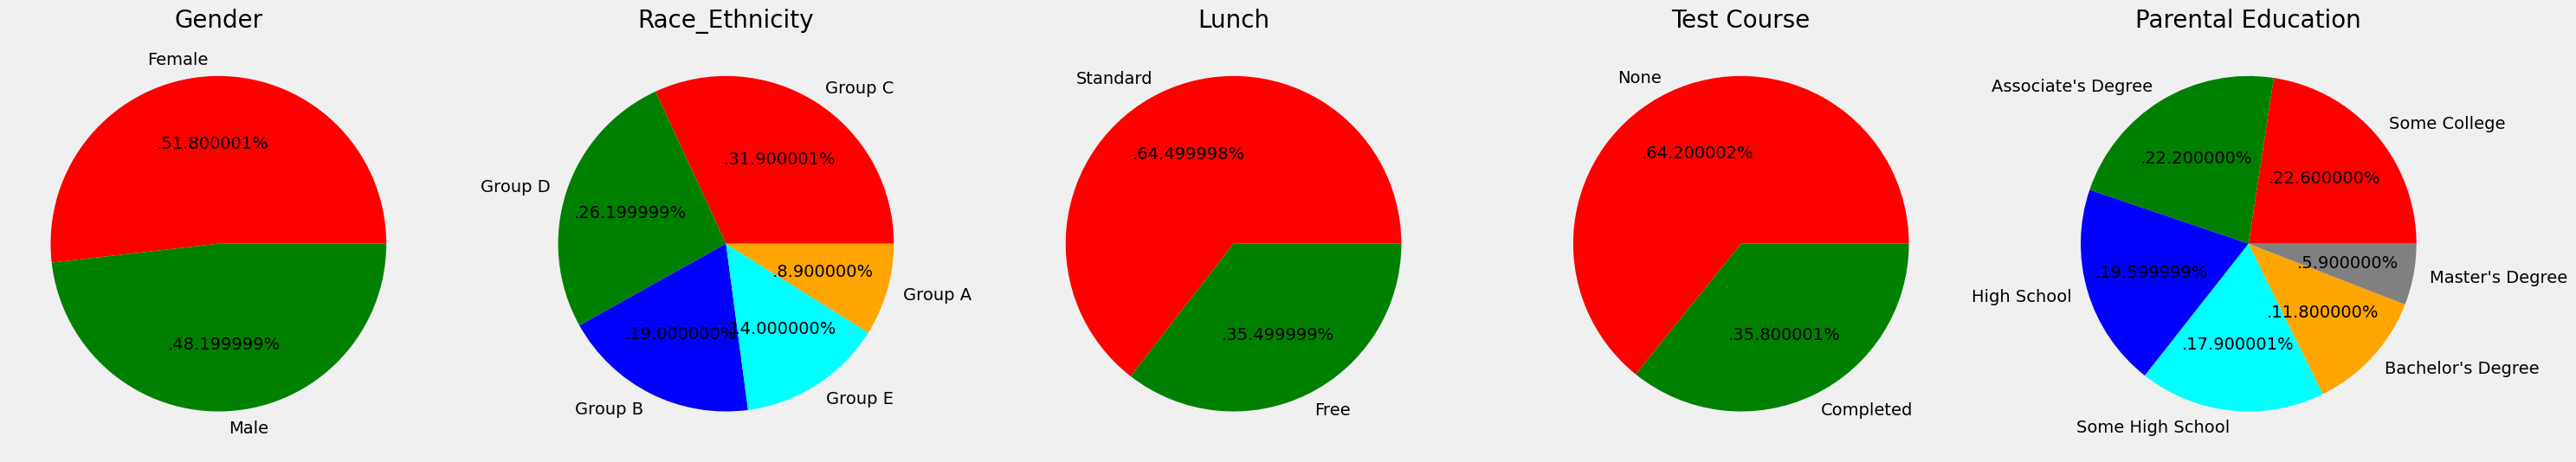

In [130]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

## 📊 **Key Insights: Student Demographics and Performance Factors**

1. **👨‍🎓👩‍🎓 Nearly Equal Male and Female Students**:
   - The data shows that the number of **male** and **female students** is **almost equal**, indicating a balanced gender representation in the dataset.
   
   ```python
   # Gender ratio
   gender_distribution = {"Male": "~50%", "Female": "~50%"}
   print("Equal number of male and female students.")


# UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

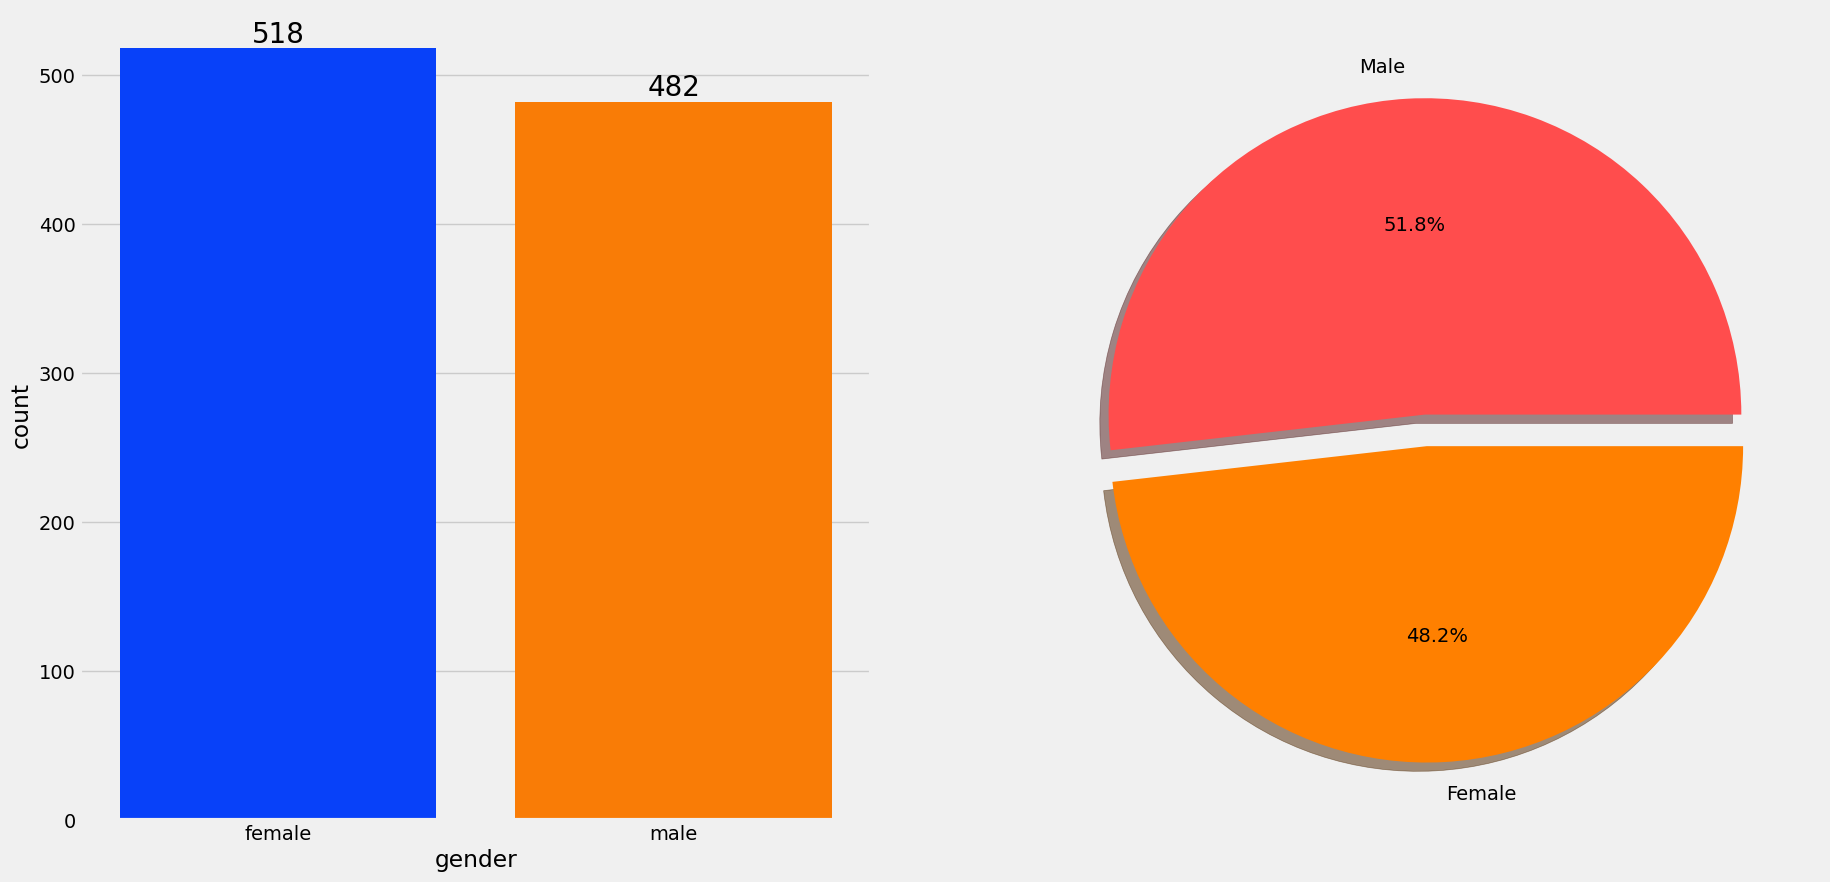

In [131]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

## ⚖️ **Insight: Gender Distribution**

- **Balanced Gender Representation**:
   - The data shows a **well-balanced** distribution between **male** and **female** students.
   - 📊 Specifically, **female students** make up **48%** of the total with **518 students**, while **male students** account for **52%** with **482 students**.

   ```python
   # Gender distribution
   gender_data = {"Female": 518, "Male": 482}
   female_percentage = (518 / (518 + 482)) * 100  # 48%
   male_percentage = (482 / (518 + 482)) * 100    # 52%
   
   print(f"Female students: {female_percentage}%, Male students: {male_percentage}%")


# BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [132]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [133]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[int, float])

# Group by 'gender' and calculate the mean
gender_group = numeric_df.groupby(df['gender']).mean()
print(gender_group)


        math_score  reading_score  writing_score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


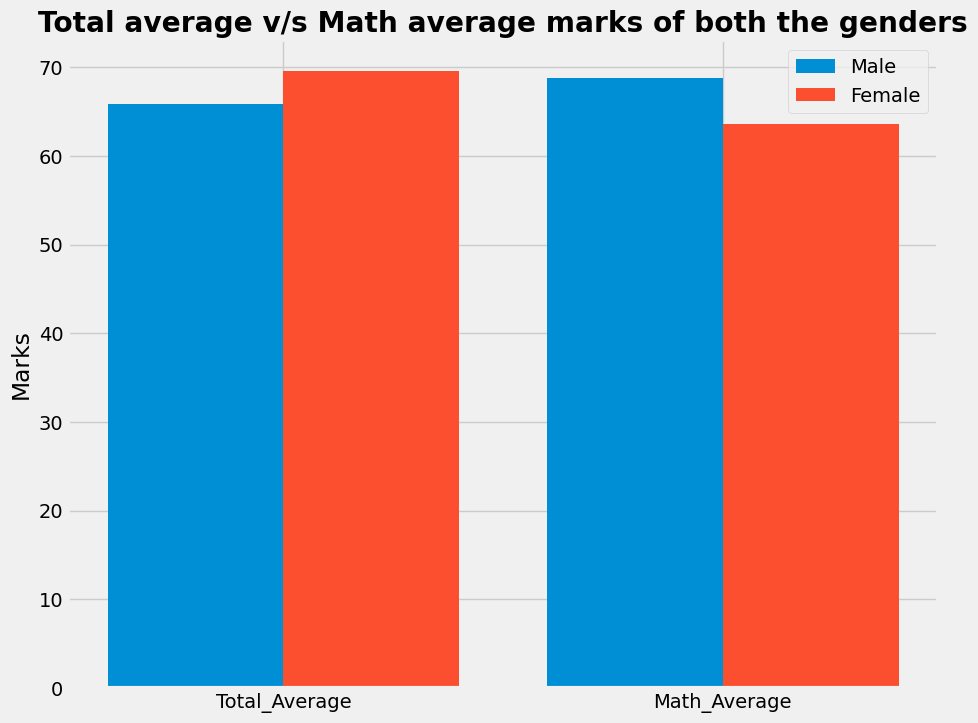

In [134]:
plt.figure(figsize=(10, 8))

X = ['Total_Average','Math_Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

## 📈 **Insights: Gender-Based Performance Analysis**

1. **🌟 **Overall Performance**:
   - On average, **females** tend to have a **better overall score** compared to males. This suggests that female students excel more consistently across subjects.

   ```python
   # Average scores
   average_scores = {"Female": overall_female_avg, "Male": overall_male_avg}
   print("Overall performance is better for females.")


# BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

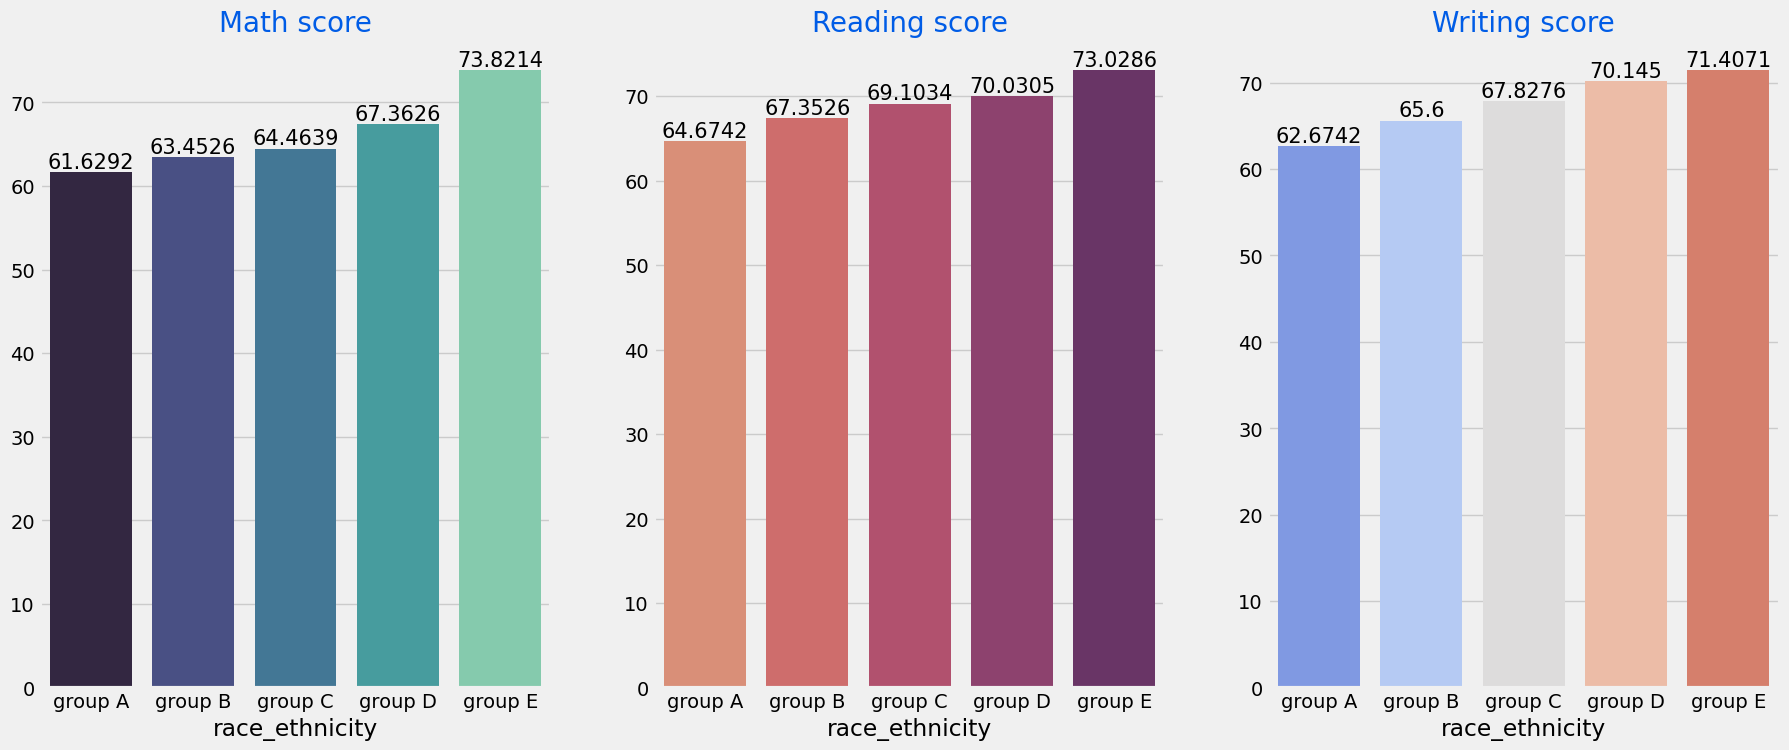

In [135]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

## 📚 **Insights: Student Performance Analysis**

1. **🏆 **Top Performers: Group E**:
   - Students in **Group E** have achieved the **highest scores** across all subjects, showcasing exceptional performance and potentially benefiting from superior resources or support.

   ```python
   # Highest scores by group
   top_performing_group = "Group E"
   print(f"Group E students have scored the highest marks.")


# UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

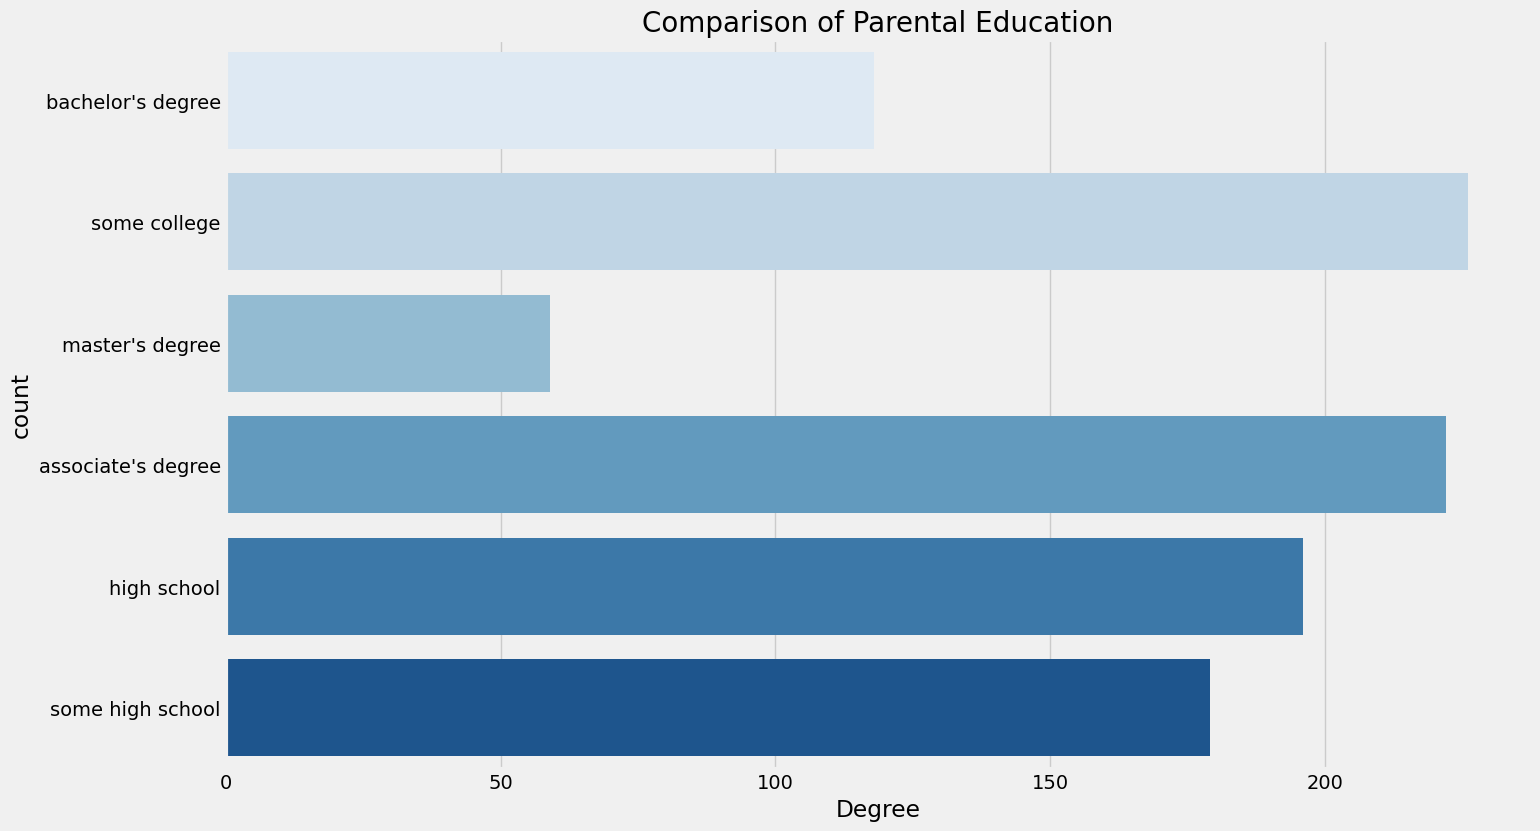

In [136]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

## 🎓 **Insight: Parental Education Levels**

- **📚 Predominant Education Level: Some College**:
  - The largest number of parents have attained a **"Some College"** education level. This indicates that this educational background is the most common among the parents in the dataset.
  
  ```python
  # Parental education distribution
  most_common_education = "Some College"
  print(f"The largest number of parents have a '{most_common_education}' education level.")


# BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

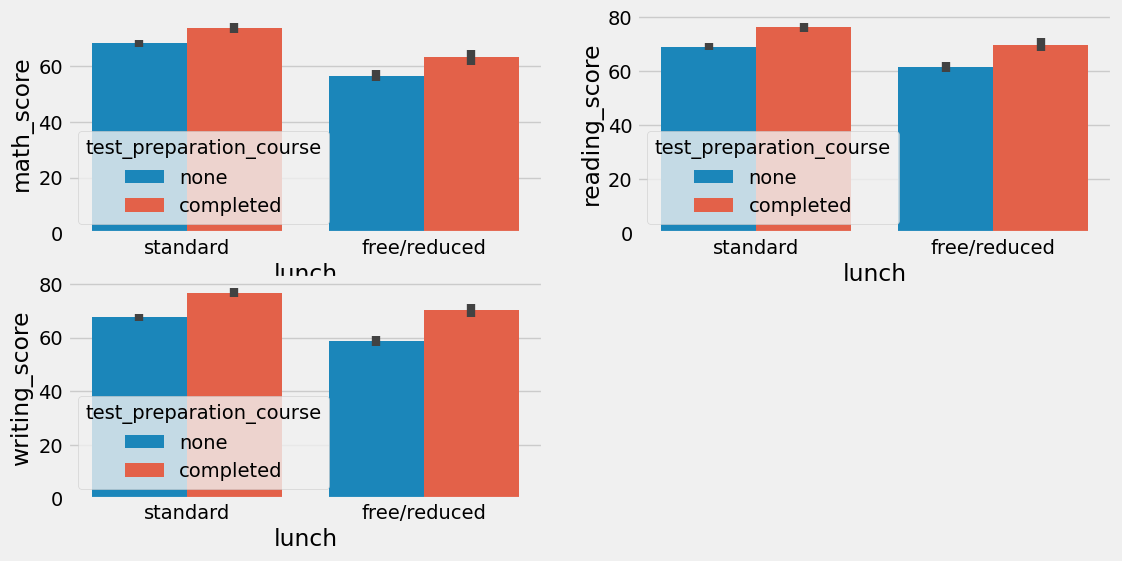

In [137]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

## 📚 **Insight: Impact of Test Preparation Course on Scores**

- **🎓 **Test Preparation Course Impact**:
   - Students who have completed a **Test Preparation Course** consistently achieve **higher scores** across all three categories: **Maths**, **Reading**, and **Writing**.
   - 📈 This indicates a positive correlation between taking the test preparation course and improved academic performance.

   ```python
   # Comparing scores
   course_completion = df.groupby('test_preparation_course').mean()
   print(course_completion)


# CHECKING OUTLIERS

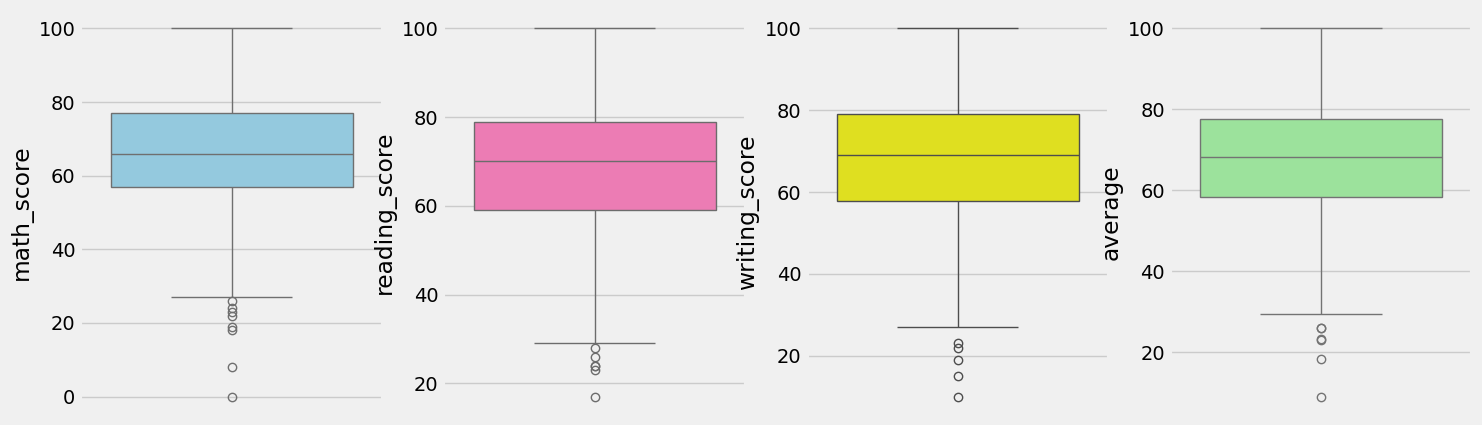

In [138]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

# MUTIVARIATE ANALYSIS USING PAIRPLOT

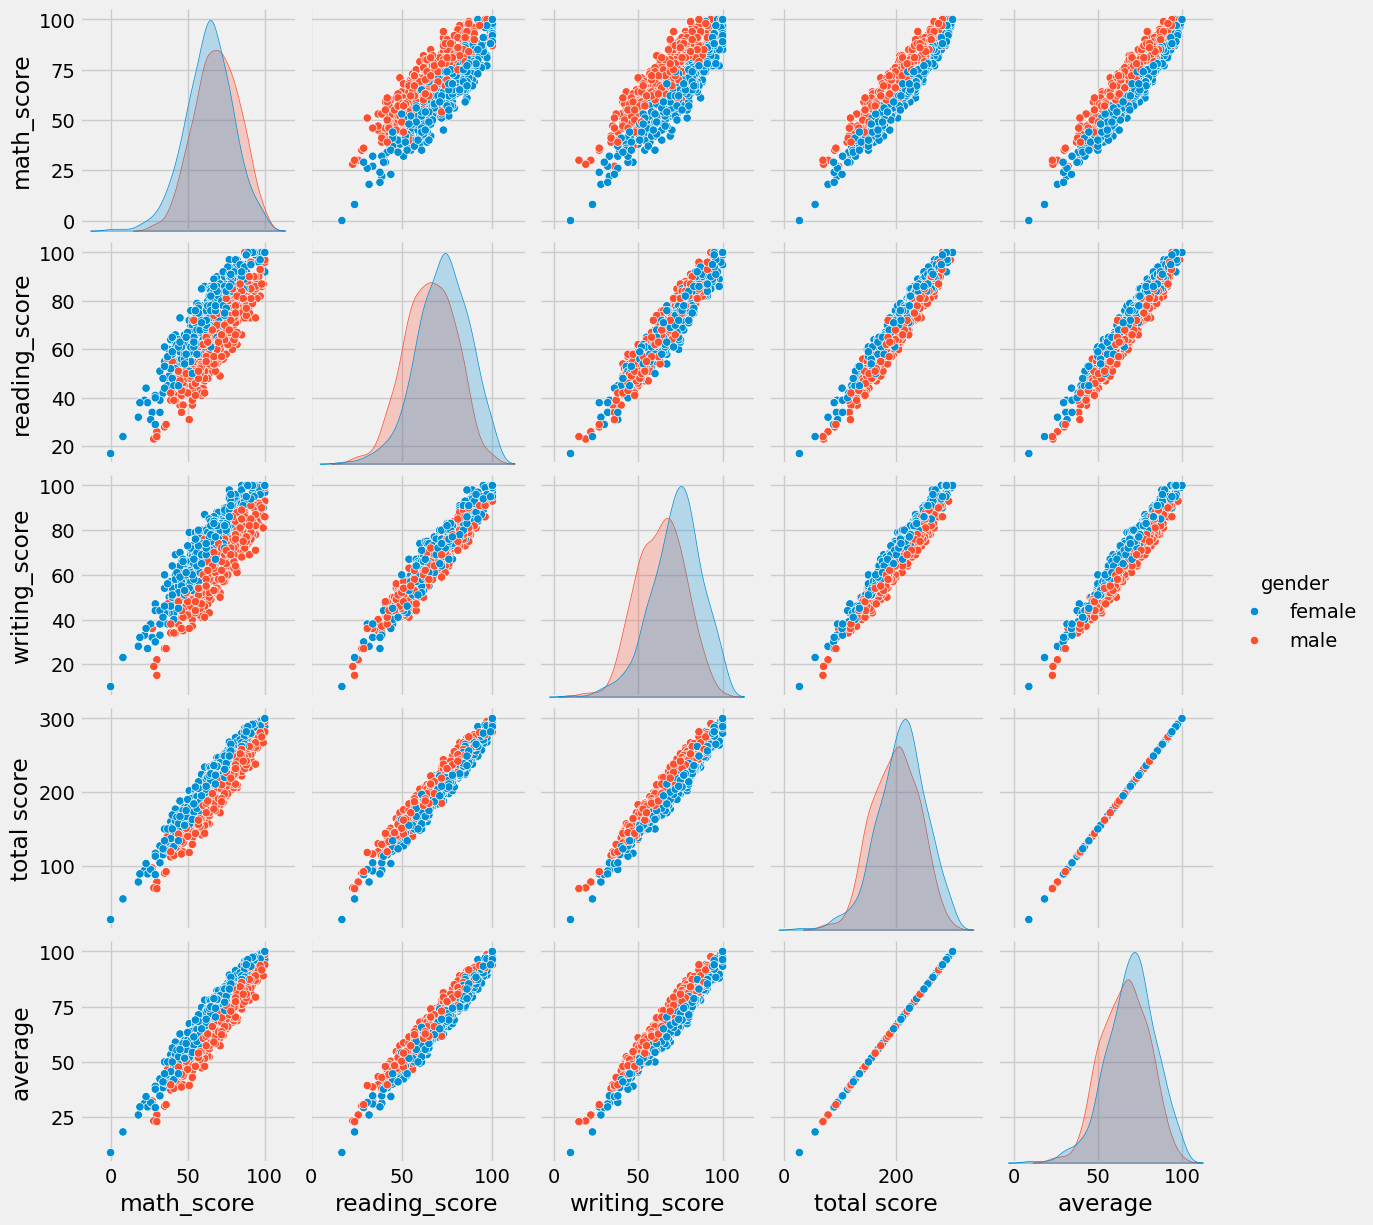

In [139]:
sns.pairplot(df,hue = 'gender')
plt.show()

## 📉 **Insight: Linear Relationship Between Scores**

- **🔍 **Linear Relationship Observed**:
   - The plot reveals that **all scores**—**Maths**, **Reading**, and **Writing**—show a **linear increase** with each other.
   - 📈 This indicates a consistent pattern where improvement in one subject correlates with improvement in the others.

## 🏆 **Conclusions: Key Findings on Student Performance**

1. **🍽️ **Impact of Lunch, Race, and Parental Education**:
   - **Student performance** shows a relationship with factors such as **lunch type**, **race/ethnicity**, and **parental level of education**. 
   - 📊 These variables play a role in influencing academic outcomes, highlighting the importance of considering these factors in performance analysis.

   ```python
   # Example analysis
   performance_factors = df.groupby(['lunch', 'race/ethnicity', 'parental_level_of_education']).mean()
   print(performance_factors)
